# MVP Comunidad Valenciana

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime as dt
from tools import dataoveriew, plot_roc_curve, plot_confusion_matrix
from datetime import datetime
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns = None

%matplotlib inline

In [2]:
data = pd.read_excel('../data/portfolio_com_valencia.xlsx')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
1,2015-01-03,1833306,Normal,SDVFAST,Este,Alicante,3689,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,HBD,2017-12-31,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,0
2,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0
3,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
4,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,53


In [3]:
data.shape

(55225, 28)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55225 entries, 0 to 55224
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Installation Date       55225 non-null  datetime64[ns]
 1   Installation Number     55225 non-null  int64         
 2   Client Type             55225 non-null  object        
 3   Panel                   55225 non-null  object        
 4   Territorial             55225 non-null  object        
 5   Provincia               55225 non-null  object        
 6   Zip                     55225 non-null  int64         
 7   Gender                  55225 non-null  object        
 8   Nationality             55225 non-null  object        
 9   Country Of Birth        55225 non-null  object        
 10  Born Date               54999 non-null  datetime64[ns]
 11  Housing Type            55225 non-null  object        
 12  Labor Situation         55225 non-null  object

In [5]:
data.isnull().sum()

Installation Date           0
Installation Number         0
Client Type                 0
Panel                       0
Territorial                 0
Provincia                   0
Zip                         0
Gender                      0
Nationality                 0
Country Of Birth            0
Born Date                 226
Housing Type                0
Labor Situation             0
Marital Status              0
Income Amount               0
Number Pay                  0
Price List                  0
Monitoring Status Date      0
Monitoring Status           0
Tipo Instalacion            0
Financiado                  0
Rango Kit                   0
Resumen Precio              0
Kit Contado                 0
Kit Total                   0
Kit Mensualidad             0
Quejas                      0
MT                          0
dtype: int64

In [6]:
dataoveriew(data, 'Overiew of the dataset')

Overiew of the dataset:

Número de Filas: 55225

Número de Columnas: 28

Columnas:

['Installation Date', 'Installation Number', 'Client Type', 'Panel', 'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality', 'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation', 'Marital Status', 'Income Amount', 'Number Pay', 'Price List', 'Monitoring Status Date', 'Monitoring Status', 'Tipo Instalacion', 'Financiado', 'Rango Kit', 'Resumen Precio', 'Kit Contado', 'Kit Total', 'Kit Mensualidad', 'Quejas', 'MT']

Valores nulos: 226

Valores únicos:

Installation Date          2124
Installation Number       55209
Client Type                   2
Panel                         2
Territorial                   1
Provincia                     3
Zip                         624
Gender                        2
Nationality                  11
Country Of Birth            143
Born Date                 19920
Housing Type                  5
Labor Situation               8
Marital Status             

In [7]:
data['Installation Number'] = data['Installation Number'].astype('str')
data['Zip'] = data['Zip'].astype('str')
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
1,2015-01-03,1833306,Normal,SDVFAST,Este,Alicante,3689,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,HBD,2017-12-31,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,0
2,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0
3,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
4,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,53


In [8]:
data.describe()

,Income Amount,Number Pay,Monitoring Status,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
count,5.522500e+04,55225.000000,55225.000000,55225.000000,55225.000000,55225.000000,55225.000000,55225.000000
mean,3.987351e+04,12.904083,0.258760,100.266799,473.672431,9.942363,0.346854,5.316397
std,5.108328e+06,1.062297,0.437957,99.788036,110.440491,1.528506,1.000480,18.317851
min,1.000000e+00,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.200000e+03,12.000000,0.000000,49.000000,409.000000,10.000000,0.000000,0.000000
50%,1.500000e+03,12.000000,0.000000,79.000000,459.000000,10.000000,0.000000,0.000000
75%,2.000000e+03,14.000000,1.000000,149.000000,559.000000,10.000000,0.000000,1.000000
max,1.000000e+09,16.000000,1.000000,999.000000,4529.000000,99.000000,28.000000,272.000000


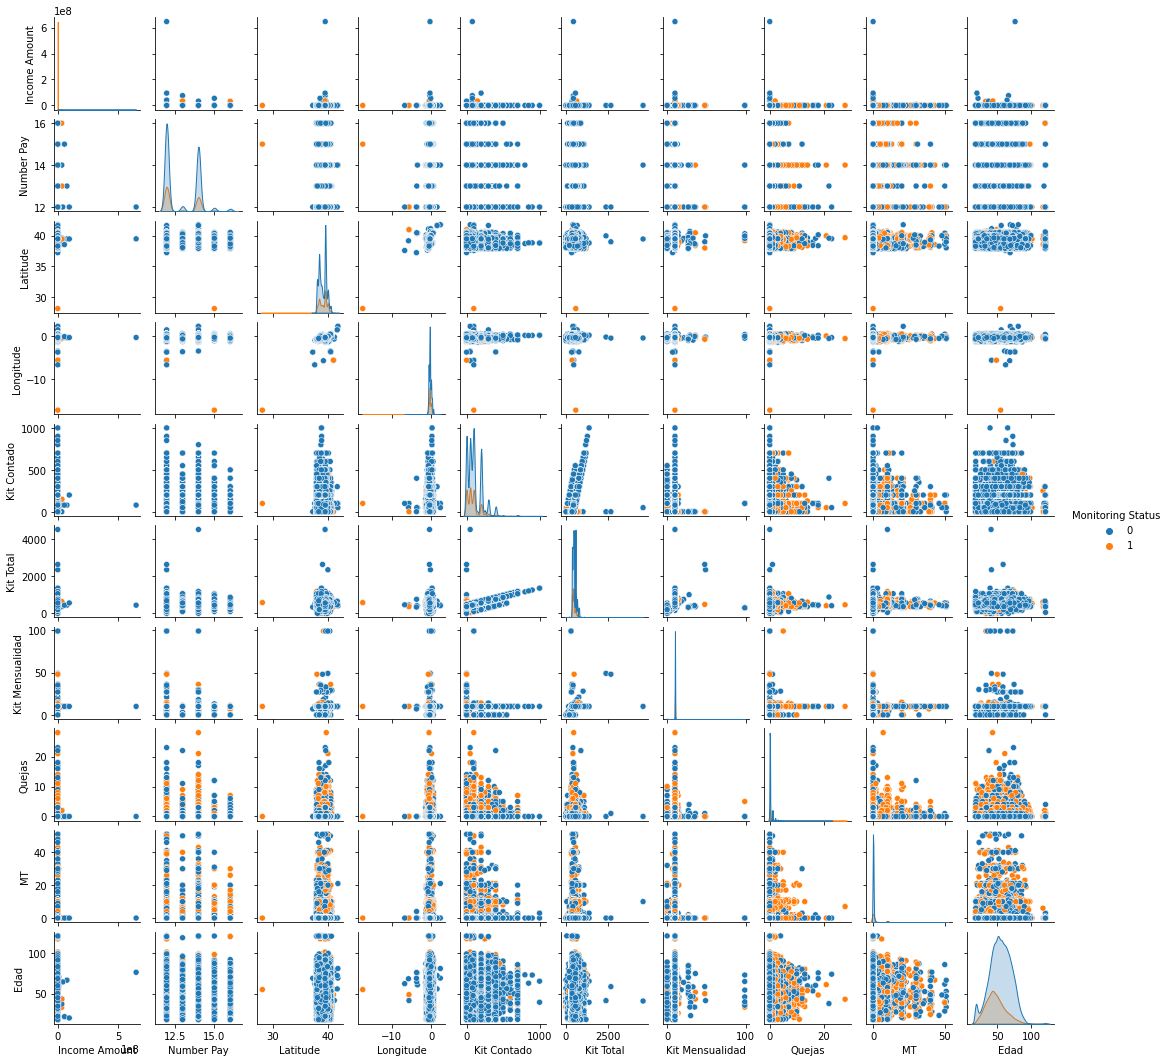

In [62]:
# Don´t do this!!!!

sns.pairplot(data = data, diag_kind = 'kde', hue = 'Monitoring Status', height = 1.5);

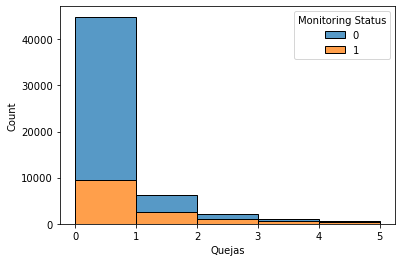

In [9]:
sns.histplot(data = data, x="Quejas", hue = 'Monitoring Status', multiple="stack",
             binwidth=1,  binrange = (0,5));

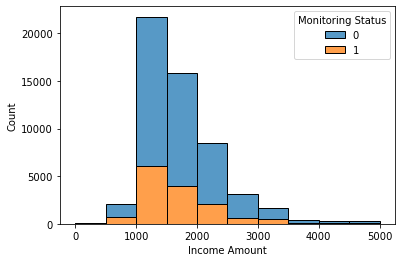

In [11]:
sns.histplot(data = data, x="Income Amount", hue = 'Monitoring Status', multiple="stack", binrange = (0,5000), bins = 10);

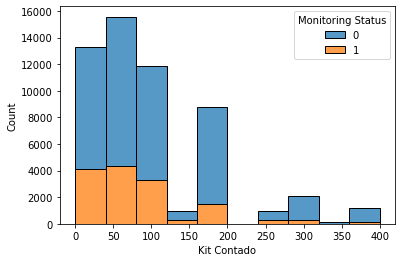

In [12]:
sns.histplot(data = data, x="Kit Contado", hue = 'Monitoring Status', multiple="stack", binrange = (0,400), bins = 10);

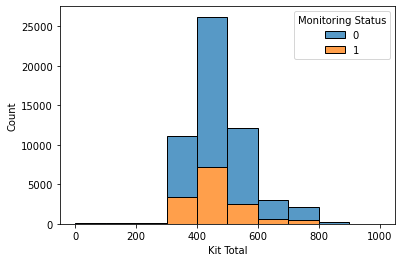

In [13]:
sns.histplot(data = data, x="Kit Total", hue = 'Monitoring Status', multiple="stack", binrange = (0,1000), bins = 10);

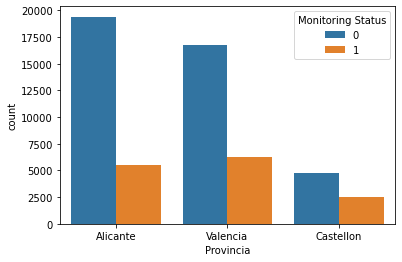

In [14]:
sns.countplot(x="Provincia", hue = 'Monitoring Status',data = data);

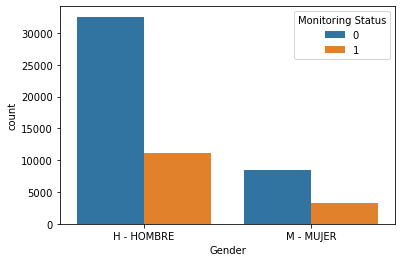

In [15]:
sns.countplot(x="Gender", hue = 'Monitoring Status',data = data);

In [16]:
corr = data.corr()
corr

,Income Amount,Number Pay,Monitoring Status,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
Income Amount,1.000000,-0.000861,-0.003719,0.003113,0.002119,0.000272,-0.002292,-0.001875
Number Pay,-0.000861,1.000000,-0.066064,0.015663,-0.006858,-0.000851,-0.014529,-0.024050
Monitoring Status,-0.003719,-0.066064,1.000000,-0.114844,-0.082423,0.000504,0.191486,0.174019
Kit Contado,0.003113,0.015663,-0.114844,1.000000,0.855996,-0.078777,-0.033214,-0.012825
Kit Total,0.002119,-0.006858,-0.082423,0.855996,1.000000,0.108481,-0.048697,-0.004207
Kit Mensualidad,0.000272,-0.000851,0.000504,-0.078777,0.108481,1.000000,-0.011864,-0.003897
Quejas,-0.002292,-0.014529,0.191486,-0.033214,-0.048697,-0.011864,1.000000,0.029504
MT,-0.001875,-0.024050,0.174019,-0.012825,-0.004207,-0.003897,0.029504,1.000000


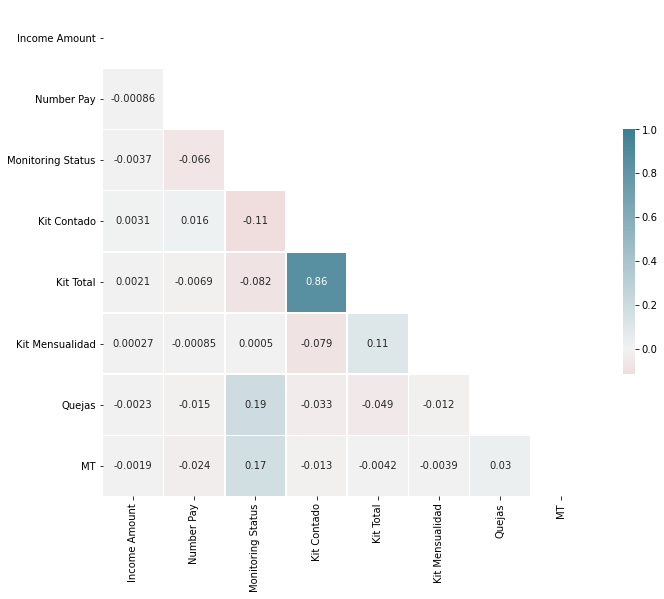

In [17]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [18]:
# Using Activo and Baja for 0 and 1    
class_names = ['Activo','Baja']

In [19]:
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
1,2015-01-03,1833306,Normal,SDVFAST,Este,Alicante,3689,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,HBD,2017-12-31,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,0
2,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0
3,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
4,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,53


## Benchmarks (Baseline)

- Naive Model
- Modelo sin variables categóricas

### Naive Model:

Modelo en el que una Queja implica la Baja

In [20]:
data_filtered = data[['Quejas', 'Monitoring Status']]
data_filtered.head()

,Quejas,Monitoring Status
0,1,1
1,0,1
2,1,1
3,1,0
4,0,1


In [21]:
y_pred = data_filtered['Quejas'].apply(lambda x: 1 if x > 0 else 0)
y_test = data_filtered['Monitoring Status']

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     40935
           1       0.46      0.33      0.39     14290

    accuracy                           0.73     55225
   macro avg       0.62      0.60      0.61     55225
weighted avg       0.70      0.73      0.71     55225



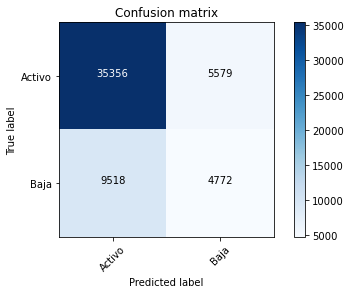

In [22]:
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

### Sin variables categóricas:

In [23]:
data_filtered = data[['Quejas', 'MT', 'Monitoring Status']]
data_filtered.head()

,Quejas,MT,Monitoring Status
0,1,0,1
1,0,0,1
2,1,0,1
3,1,0,0
4,0,53,1


In [24]:
X = data_filtered.iloc[:, :-1]
y = data_filtered.iloc[:, 2]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

#### Regresión Logística

In [26]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, class_weight="balanced")
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [27]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      8187
           1       0.48      0.49      0.48      2858

    accuracy                           0.73     11045
   macro avg       0.65      0.65      0.65     11045
weighted avg       0.73      0.73      0.73     11045



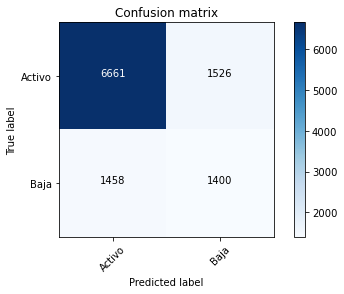

In [28]:
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.66


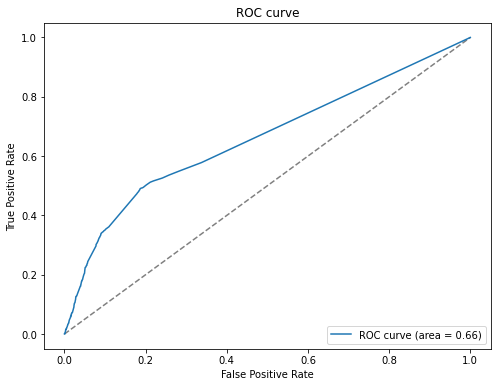

In [29]:
plot_roc_curve(classifier, X_test, y_test)

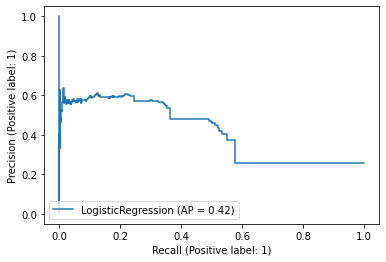

In [30]:
plot_precision_recall_curve(classifier, X_test, y_test)

## Feature engineering

- Edad en Años
- Rango de Income Amount
- Días Activo escalado
- Escalado de 'Quejas' y 'MT

Rangos de Edad:

In [31]:
data.columns

Index(['Installation Date', 'Installation Number', 'Client Type', 'Panel',
       'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality',
       'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation',
       'Marital Status', 'Income Amount', 'Number Pay', 'Price List',
       'Monitoring Status Date', 'Monitoring Status', 'Tipo Instalacion',
       'Financiado', 'Rango Kit', 'Resumen Precio', 'Kit Contado', 'Kit Total',
       'Kit Mensualidad', 'Quejas', 'MT'],
      dtype='object')

In [32]:
data['Born Date'].isnull().sum()

226

In [33]:
data['Born Date'] = data['Born Date'].replace(np.nan, datetime(1970, 1, 1))

data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
1,2015-01-03,1833306,Normal,SDVFAST,Este,Alicante,3689,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,HBD,2017-12-31,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,0
2,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0
3,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0
4,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,53


In [34]:
data['Born Date'].isnull().sum()

0

In [35]:
# Edad actual si OP y edad cuando se dio de baja si BAJA

data['Edad'] = 0
fecha = datetime(2021, 1, 19)

for i in range(len(data['Born Date'])):
    if data.loc[i, 'Monitoring Status'] == 0:
        data.loc[i,'Edad'] = ((fecha - data.loc[i,'Born Date']).days)/365
    else:
        data.loc[i,'Edad'] = ((data.loc[i,'Monitoring Status Date'] - data.loc[i,'Born Date']).days)/365
                        
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164
1,2015-01-03,1833306,Normal,SDVFAST,Este,Alicante,3689,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,HBD,2017-12-31,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712
2,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562
3,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521
4,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096


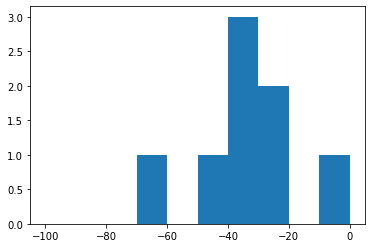

In [36]:
plt.hist(data['Edad'], range = (-100,0));

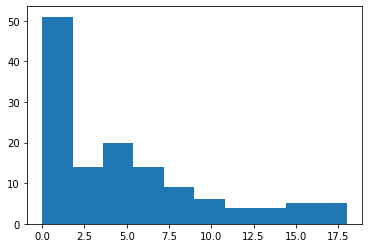

In [37]:
plt.hist(data['Edad'], range = (0,18));

In [38]:
data['Edad'].mean()

52.30091354793873

In [39]:
for i in range(len(data['Edad'])):
    if data.loc[i, 'Edad'] < 18:
        data.loc[i, 'Edad'] = data['Edad'].mean()
    else:
        continue

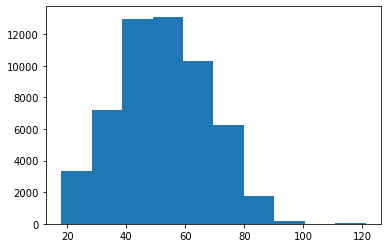

In [40]:
plt.hist(data['Edad']);

In [41]:
# Mapping Edad 
data.loc[data['Edad'] <= 30, 'Rango_Edad'] = "18-30"
data.loc[(data['Edad'] > 30) & (data['Edad'] <= 40), 'Rango_Edad'] = "30-40"
data.loc[(data['Edad'] > 40) & (data['Edad'] <= 50), 'Rango_Edad'] = "40-50"
data.loc[(data['Edad'] > 50) & (data['Edad'] <= 60), 'Rango_Edad'] = "50-60"
data.loc[(data['Edad'] > 60) & (data['Edad'] <= 70), 'Rango_Edad'] = "60-70"
data.loc[(data['Edad'] > 70) & (data['Edad'] <= 80), 'Rango_Edad'] = "70-80"
data.loc[data['Edad'] > 80, 'Rango_Edad'] = "+80"
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad,Rango_Edad
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50
1,2015-01-03,1833306,Normal,SDVFAST,Este,Alicante,3689,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,HBD,2017-12-31,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712,40-50
2,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40
3,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50
4,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096,18-30


In [42]:
tab1 = pd.crosstab(data["Rango_Edad"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Rango_Edad"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,0,1,All,0,1
Rango_Edad,,,,,
+80,1602,319,1921,0.833941,0.166059
18-30,2516,1582,4098,0.613958,0.386042
30-40,4622,3306,7928,0.582997,0.417003
40-50,8794,4082,12876,0.682976,0.317024
50-60,9820,2747,12567,0.781412,0.218588
60-70,8379,1489,9868,0.849108,0.150892
70-80,5202,765,5967,0.871795,0.128205
All,40935,14290,55225,0.741240,0.258760


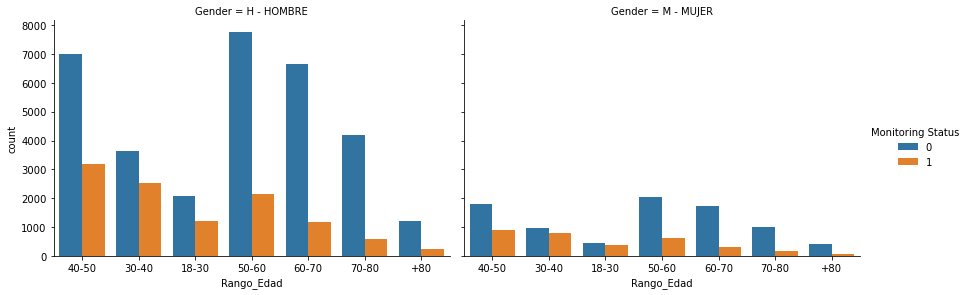

In [43]:
g = sns.catplot(x="Rango_Edad", col="Gender",
                data=data, kind="count", hue = "Monitoring Status",
                height=4, aspect=1.5);

Rangos de Income Amount:

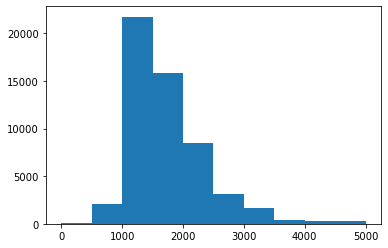

In [44]:
plt.hist(data['Income Amount'], range=(0, 5000));

In [45]:
# Mapping Income Amount
data.loc[data['Income Amount'] <= 1000, 'Income'] = "0-1000"
data.loc[(data['Income Amount'] > 1000) & (data['Income Amount'] <= 1500), 'Income'] = "1000-1500"
data.loc[(data['Income Amount'] > 1500) & (data['Income Amount'] <= 2000), 'Income'] = "1500-2000"
data.loc[(data['Income Amount'] > 2000) & (data['Income Amount'] <= 3000), 'Income'] = "2000-3000"
data.loc[data['Income Amount'] > 3000, 'Income'] = "+3000"
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad,Rango_Edad,Income
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000
1,2015-01-03,1833306,Normal,SDVFAST,Este,Alicante,3689,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,HBD,2017-12-31,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712,40-50,1000-1500
2,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000
3,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500
4,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096,18-30,0-1000


In [46]:
tab1 = pd.crosstab(data["Income"], data["Monitoring Status"], margins = True)
tab2 = pd.crosstab(data["Income"], data["Monitoring Status"], margins = True, normalize = 'index')
pd.concat([tab1, tab2], axis = 1)

Monitoring Status,0,1,All,0,1
Income,,,,,
+3000,1687,448,2135,0.790164,0.209836
0-1000,6979,3147,10126,0.689216,0.310784
1000-1500,18435,6408,24843,0.742060,0.257940
1500-2000,9482,3084,12566,0.754576,0.245424
2000-3000,4352,1203,5555,0.783438,0.216562
All,40935,14290,55225,0.741240,0.258760


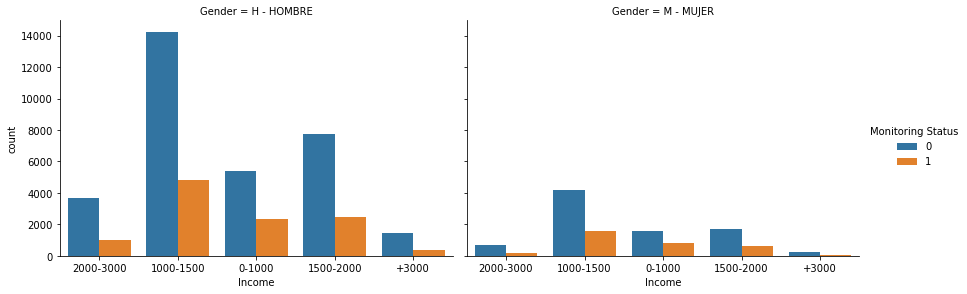

In [47]:
g = sns.catplot(x="Income", col="Gender",
                data=data, kind="count", hue = "Monitoring Status",
                height=4, aspect=1.5);

Días Activo:

In [48]:
# Días hasta el 19/01/2021 si OP y hasta cuando se dio de baja si BAJA

data['Dias_Activo'] = 0
fecha = datetime(2021, 1, 19)

for i in range(len(data['Installation Date'])):
    if data.loc[i, 'Monitoring Status'] == 0:
        data.loc[i,'Dias_Activo'] = (fecha - data.loc[i,'Installation Date']).days
    else:
        data.loc[i,'Dias_Activo'] = (data.loc[i,'Monitoring Status Date'] - data.loc[i,'Installation Date']).days
                        
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad,Rango_Edad,Income,Dias_Activo
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000,987
1,2015-01-03,1833306,Normal,SDVFAST,Este,Alicante,3689,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,HBD,2017-12-31,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712,40-50,1000-1500,1093
2,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000,1150
3,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500,2206
4,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096,18-30,0-1000,1165


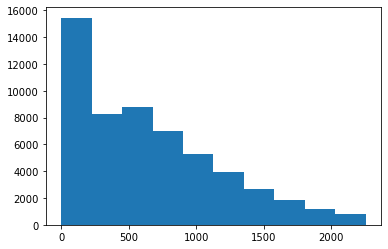

In [49]:
plt.hist(data['Dias_Activo']);

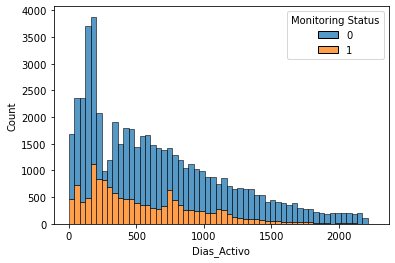

In [50]:
sns.histplot(data = data, x = 'Dias_Activo', hue = 'Monitoring Status', multiple = 'stack')

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Dias_Activo_sca'] = scaler.fit_transform(data['Dias_Activo'].values.reshape(-1, 1))
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_sca
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000,987,0.437694
1,2015-01-03,1833306,Normal,SDVFAST,Este,Alicante,3689,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,HBD,2017-12-31,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712,40-50,1000-1500,1093,0.484701
2,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000,1150,0.509978
3,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500,2206,0.978271
4,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096,18-30,0-1000,1165,0.516630


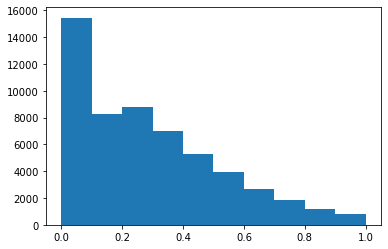

In [52]:
plt.hist(data['Dias_Activo_sca']);

Escalado de Quejas y Missing Test (MT):

In [53]:
scaler = MinMaxScaler()
data['Quejas_sca'] = scaler.fit_transform(data['Quejas'].values.reshape(-1, 1))
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_sca,Quejas_sca
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000,987,0.437694,0.035714
1,2015-01-03,1833306,Normal,SDVFAST,Este,Alicante,3689,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,HBD,2017-12-31,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712,40-50,1000-1500,1093,0.484701,0.000000
2,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000,1150,0.509978,0.035714
3,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500,2206,0.978271,0.035714
4,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096,18-30,0-1000,1165,0.516630,0.000000


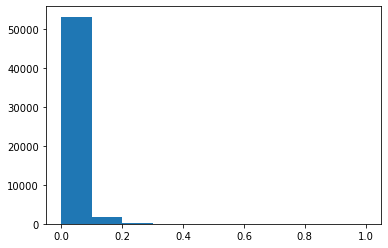

In [54]:
plt.hist(data['Quejas_sca']);

In [55]:
scaler = MinMaxScaler()
data['MT_sca'] = scaler.fit_transform(data['MT'].values.reshape(-1, 1))
data.head()

,Installation Date,Installation Number,Client Type,Panel,Territorial,Provincia,Zip,Gender,Nationality,Country Of Birth,Born Date,Housing Type,Labor Situation,Marital Status,Income Amount,Number Pay,Price List,Monitoring Status Date,Monitoring Status,Tipo Instalacion,Financiado,Rango Kit,Resumen Precio,Kit Contado,Kit Total,Kit Mensualidad,Quejas,MT,Edad,Rango_Edad,Income,Dias_Activo,Dias_Activo_sca,Quejas_sca,MT_sca
0,2015-01-02,1833185,Normal,SDVFAST,Este,Alicante,3300,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1973-05-19,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,2500,14,HBD,2017-09-15,1,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.356164,40-50,2000-3000,987,0.437694,0.035714,0.000000
1,2015-01-03,1833306,Normal,SDVFAST,Este,Alicante,3689,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-05-08,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1200,14,HBD,2017-12-31,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,0,41.676712,40-50,1000-1500,1093,0.484701,0.000000,0.000000
2,2015-01-05,1833404,Normal,SDVFAST,Este,Valencia,46117,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1982-03-15,1 - PROPIEDAD SIN HIPOTECA,02 ASALARIADO TEMPORAL,1 - SOLTERO,800,14,EED,2018-02-28,1,"P-Chalet, villa (domicilio particular)",Financiado,Entre 000-050,49+(36*10),49,409,10,1,0,35.983562,30-40,0-1000,1150,0.509978,0.035714,0.000000
3,2015-01-05,1833511,Normal,SDVFAST,Este,Alicante,3150,H - HOMBRE,ES - ESPAÑOLA,SPAIN,1976-02-02,1 - PROPIEDAD SIN HIPOTECA,04 AUTONOMO,2 - CASADO,1500,12,HBD,2015-01-07,0,"P-Chalet, villa (domicilio particular)",Financiado,A 0,0+(36*10),0,360,10,1,0,44.994521,40-50,1000-1500,2206,0.978271,0.035714,0.000000
4,2015-01-05,1833532,Normal,SDVFAST,Este,Alicante,3294,M - MUJER,ES - ESPAÑOLA,SPAIN,1989-07-31,1 - PROPIEDAD SIN HIPOTECA,06 PARADO,1 - SOLTERO,1000,12,HBD,2018-03-15,1,P-Apartamento (domicilio particular),Financiado,A 0,0+(36*10),0,360,10,0,53,28.641096,18-30,0-1000,1165,0.516630,0.000000,0.194853


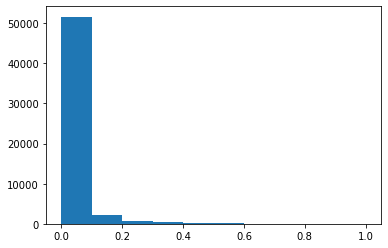

In [56]:
plt.hist(data['MT_sca']);

## Enconding con ``get_dummies``

In [57]:
data.columns

Index(['Installation Date', 'Installation Number', 'Client Type', 'Panel',
       'Territorial', 'Provincia', 'Zip', 'Gender', 'Nationality',
       'Country Of Birth', 'Born Date', 'Housing Type', 'Labor Situation',
       'Marital Status', 'Income Amount', 'Number Pay', 'Price List',
       'Monitoring Status Date', 'Monitoring Status', 'Tipo Instalacion',
       'Financiado', 'Rango Kit', 'Resumen Precio', 'Kit Contado', 'Kit Total',
       'Kit Mensualidad', 'Quejas', 'MT', 'Edad', 'Rango_Edad', 'Income',
       'Dias_Activo', 'Dias_Activo_sca', 'Quejas_sca', 'MT_sca'],
      dtype='object')

In [58]:
data_filtered = data[['Gender', 'Housing Type', 'Tipo Instalacion', 'Labor Situation', 'Marital Status', 
                      'Provincia', 'Nationality', 'Rango_Edad', 'Income', 'Rango Kit', 'Number Pay', 'Dias_Activo_sca',
                      'Quejas_sca', 'MT_sca', 'Monitoring Status']]
data_filtered.columns

Index(['Gender', 'Housing Type', 'Tipo Instalacion', 'Labor Situation',
       'Marital Status', 'Provincia', 'Nationality', 'Rango_Edad', 'Income',
       'Rango Kit', 'Number Pay', 'Dias_Activo_sca', 'Quejas_sca', 'MT_sca',
       'Monitoring Status'],
      dtype='object')

In [59]:
Gender = pd.get_dummies(data = data_filtered['Gender'],prefix = "Gender")
House = pd.get_dummies(data = data_filtered['Housing Type'],prefix = "House")
Labor = pd.get_dummies(data = data_filtered['Labor Situation'],prefix = "Labor")
Marital = pd.get_dummies(data = data_filtered['Marital Status'],prefix = "Marital")
Provincia = pd.get_dummies(data = data_filtered['Provincia'],prefix = "Provincia")
Nationality = pd.get_dummies(data = data_filtered['Nationality'],prefix = "Nationality")
Edad = pd.get_dummies(data = data_filtered['Rango_Edad'],prefix = "Rango_Edad")
Income = pd.get_dummies(data = data_filtered['Income'],prefix = "Income")
Kit = pd.get_dummies(data = data_filtered['Rango Kit'],prefix = 'Rango_Kit')
Tipo = pd.get_dummies(data = data_filtered['Tipo Instalacion'],prefix = "Tipo")
N_Pay = pd.get_dummies(data = data_filtered['Number Pay'],prefix = "N_Pay")

In [60]:
data_filtered.drop(['Gender','Housing Type','Labor Situation','Provincia', 'Tipo Instalacion', 'Number Pay',
                    'Nationality', 'Marital Status', 'Rango_Edad', 'Rango Kit', 'Income'],axis=1,inplace=True)

C:\Users\alber\anaconda3\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
dummy_df = pd.concat([data_filtered,Gender,House,Labor,Marital,Provincia,Nationality,Edad,Income,Kit,Tipo,N_Pay],axis=1)
dummy_df.columns

Index(['Dias_Activo_sca', 'Quejas_sca', 'MT_sca', 'Monitoring Status',
       'Gender_H - HOMBRE', 'Gender_M - MUJER',
       'House_1 - PROPIEDAD SIN HIPOTECA', 'House_2 - PROPIEDAD HIPOTECADA',
       'House_3 - ALQUILER', 'House_4 - FAMILIARES/PADRES',
       'House_5 - EMPRESA', 'Labor_01 ASALARIADO FIJO',
       'Labor_02 ASALARIADO TEMPORAL', 'Labor_03 FUNCIONARIO',
       'Labor_04 AUTONOMO', 'Labor_06 PARADO',
       'Labor_07 PENSIONISTA (JUBILACION)', 'Labor_08 PENSIONISTA (VIUDEDAD)',
       'Labor_09 PENSIONISTA (LARGA ENFERMEDAD)', 'Marital_1 - SOLTERO',
       'Marital_2 - CASADO', 'Marital_3 - VIUDO',
       'Marital_4 - SEPARADO/DIVORCIADO', 'Marital_5 ? PAREJA DE HECHO',
       'Marital_5 â PAREJA DE HECHO', 'Provincia_Alicante',
       'Provincia_Castellon', 'Provincia_Valencia',
       'Nationality_AF - AFRICA MENOS MAGREB',
       'Nationality_AJ - AUSTRALIA Y JAPON',
       'Nationality_AS - ASIA MENOS JAPON', 'Nationality_ES - ESPAÃOLA',
       'Nationality_ES 

In [62]:
dummy_df.head()

,Dias_Activo_sca,Quejas_sca,MT_sca,Monitoring Status,Gender_H - HOMBRE,Gender_M - MUJER,House_1 - PROPIEDAD SIN HIPOTECA,House_2 - PROPIEDAD HIPOTECADA,House_3 - ALQUILER,House_4 - FAMILIARES/PADRES,House_5 - EMPRESA,Labor_01 ASALARIADO FIJO,Labor_02 ASALARIADO TEMPORAL,Labor_03 FUNCIONARIO,Labor_04 AUTONOMO,Labor_06 PARADO,Labor_07 PENSIONISTA (JUBILACION),Labor_08 PENSIONISTA (VIUDEDAD),Labor_09 PENSIONISTA (LARGA ENFERMEDAD),Marital_1 - SOLTERO,Marital_2 - CASADO,Marital_3 - VIUDO,Marital_4 - SEPARADO/DIVORCIADO,Marital_5 ? PAREJA DE HECHO,Marital_5 â PAREJA DE HECHO,Provincia_Alicante,Provincia_Castellon,Provincia_Valencia,Nationality_AF - AFRICA MENOS MAGREB,Nationality_AJ - AUSTRALIA Y JAPON,Nationality_AS - ASIA MENOS JAPON,Nationality_ES - ESPAÃOLA,Nationality_ES - ESPAÑOLA,Nationality_IB - IBEROAMERICA,Nationality_MA - MAGREB,Nationality_OT - OTROS,Nationality_RE - RESTO DE EUROPA,Nationality_UE - UNION EUROPEA,Nationality_US - USA / CANADA,Rango_Edad_+80,Rango_Edad_18-30,Rango_Edad_30-40,Rango_Edad_40-50,Rango_Edad_50-60,Rango_Edad_60-70,Rango_Edad_70-80,Income_+3000,Income_0-1000,Income_1000-1500,Income_1500-2000,Income_2000-3000,Rango_Kit_A 0,Rango_Kit_Entre 000-050,Rango_Kit_Entre 050-100,Rango_Kit_Entre 100-200,Rango_Kit_Entre 200-300,Rango_Kit_Mas de 300,Tipo_C-Comunidad de Propietarios,Tipo_N- Oficinas en Altura,"Tipo_N-Bar, Pub, Restaurante",Tipo_N-Casetas de Obra,"Tipo_N-Nave, taller (industrial)","Tipo_N-Oficinas, empresas",Tipo_N-Tienda- negocio al publico,Tipo_P-Apartamento (domicilio particular),Tipo_P-Chalet Pareado,Tipo_P-Chalet adosado,"Tipo_P-Chalet, villa (domicilio particular)",Tipo_P-Coche [OnRoad],N_Pay_12,N_Pay_13,N_Pay_14,N_Pay_15,N_Pay_16
0,0.437694,0.035714,0.000000,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.484701,0.000000,0.000000,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0.509978,0.035714,0.000000,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0.978271,0.035714,0.000000,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0.516630,0.000000,0.194853,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [63]:
X = dummy_df.drop(['Monitoring Status'],axis=1).values
y = dummy_df['Monitoring Status'].values

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Regresión Logística

Logistic Accuracy is 0.75
Cross Validation Score = 0.74
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      8187
           1       0.51      0.70      0.59      2858

    accuracy                           0.75     11045
   macro avg       0.69      0.73      0.70     11045
weighted avg       0.78      0.75      0.76     11045



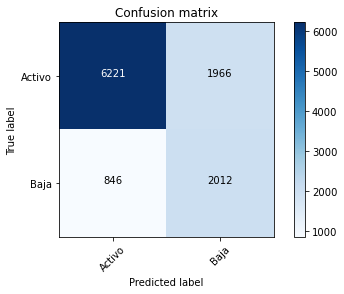

In [65]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state = 0, max_iter=1000, class_weight="balanced")
LR.fit(X_train,y_train) 
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))

skf = StratifiedKFold(n_splits=5)
score_LR = cross_val_score(LR, X_test, y_test, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_LR)

y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.80


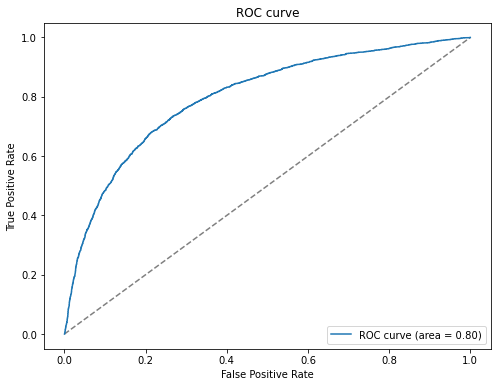

In [66]:
plot_roc_curve(LR, X_test, y_test)

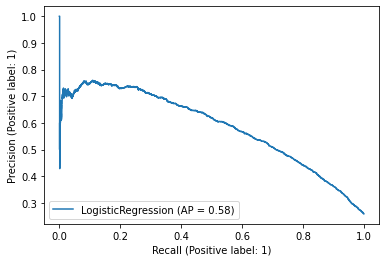

In [67]:
plot_precision_recall_curve(LR, X_test, y_test);

### KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
# Don´t do this!!!

skf = StratifiedKFold(n_splits=5)
knn = GridSearchCV(KNeighborsClassifier(),
                      param_grid = {'n_neighbors':np.arange(3,17,2)},
                      scoring = 'recall', cv = skf)

knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15])},
             scoring='recall')

In [74]:
knn.best_params_

{'n_neighbors': 3}

In [69]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
y_pred = knn.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      8187
           1       0.54      0.37      0.44      2858

    accuracy                           0.76     11045
   macro avg       0.67      0.63      0.64     11045
weighted avg       0.73      0.76      0.74     11045



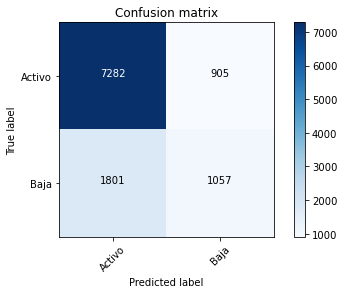

In [71]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.69


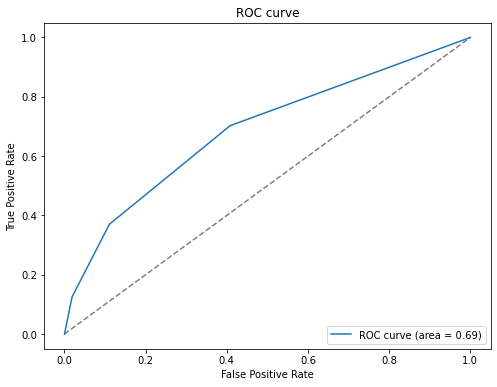

In [72]:
plot_roc_curve(knn, X_test, y_test)

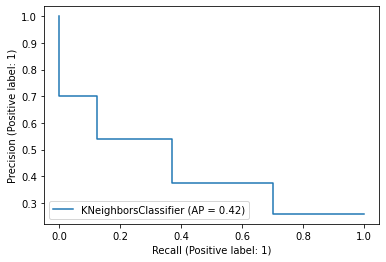

In [73]:
plot_precision_recall_curve(knn, X_test, y_test);

### Decission Tree Classifier

Decision Tree Accuracy is 0.72
Cross Validation Score = 0.73
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      8187
           1       0.47      0.70      0.56      2858

    accuracy                           0.72     11045
   macro avg       0.67      0.71      0.68     11045
weighted avg       0.77      0.72      0.73     11045



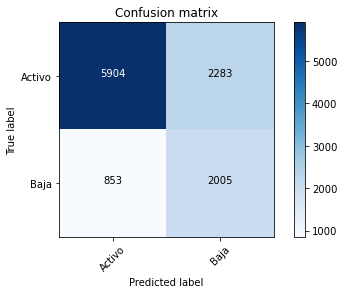

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

DT = DecisionTreeClassifier(random_state = 0,class_weight="balanced", min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))

skf = StratifiedKFold(n_splits=5)
score_DT = cross_val_score(DT, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_DT)

y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.79


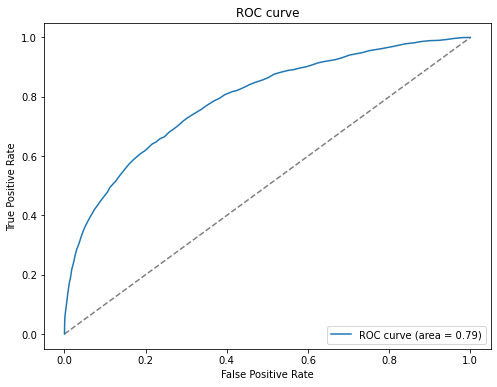

In [75]:
plot_roc_curve(DT, X_test, y_test)

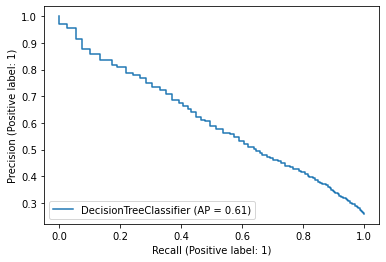

In [76]:
plot_precision_recall_curve(DT, X_test, y_test);

### Random Forest Classifier

Random Forest Accuracy is 0.80
Cross Validation Score = 0.81
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      8187
           1       0.61      0.63      0.62      2858

    accuracy                           0.80     11045
   macro avg       0.74      0.74      0.74     11045
weighted avg       0.80      0.80      0.80     11045



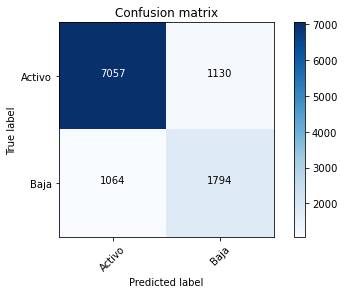

In [77]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))

skf = StratifiedKFold(n_splits=20)
score_rfc = cross_val_score(rfc, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_rfc)

y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.84


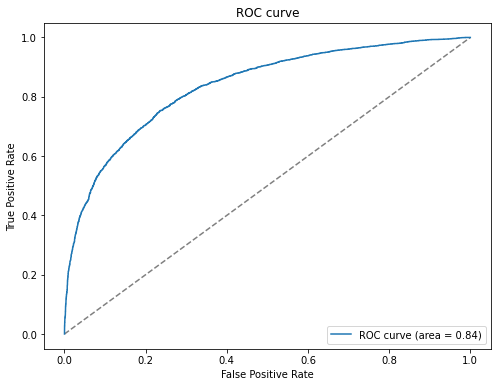

In [78]:
plot_roc_curve(rfc, X_test, y_test)

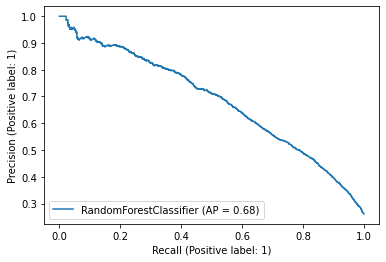

In [79]:
plot_precision_recall_curve(rfc, X_test, y_test);

### XGBoost

GradientBoost Accuracy= 0.83
Cross Validation Score = 0.83
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      8187
           1       0.76      0.49      0.60      2858

    accuracy                           0.83     11045
   macro avg       0.80      0.72      0.74     11045
weighted avg       0.82      0.83      0.81     11045



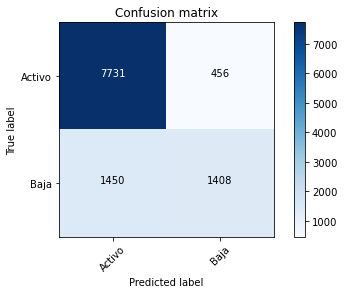

In [80]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000, booster='gbtree', learning_rate=0.01, objective='binary:logistic')
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print ("GradientBoost Accuracy= %2.2f" % accuracy_score(y_test, y_pred))

skf = StratifiedKFold(n_splits=5)
score_xgb = cross_val_score(xgb, X_train, y_train, cv=skf).mean()
print("Cross Validation Score = %2.2f" % score_xgb)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

ROC AUC score: 0.86


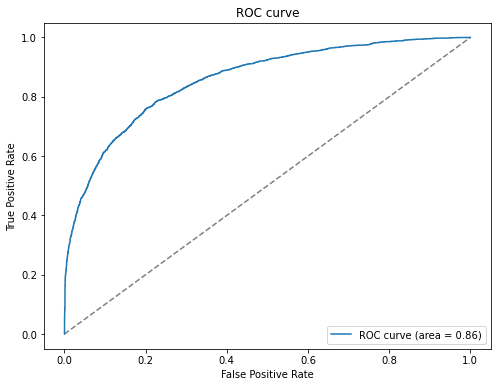

In [81]:
plot_roc_curve(xgb, X_test, y_test)

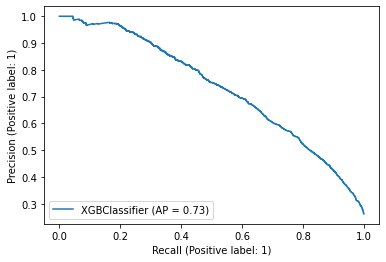

In [82]:
plot_precision_recall_curve(xgb, X_test, y_test);

### Comparing ROC Curves

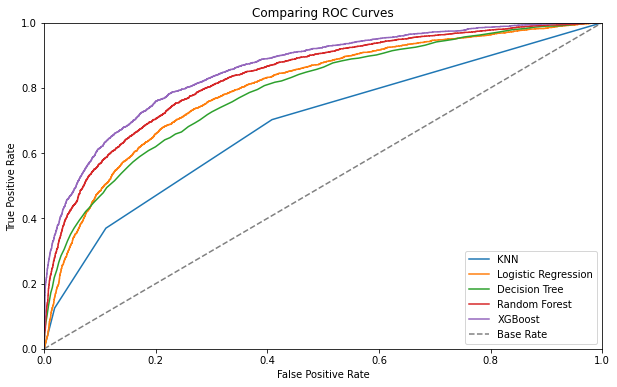

In [83]:
plt.figure(figsize = (10,6), linewidth= 1)

knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
LR_fpr, LR_tpr, thresholds = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])

plt.plot(knn_fpr, knn_tpr, label='KNN' )
plt.plot(LR_fpr, LR_tpr, label='Logistic Regression')
plt.plot(DT_fpr, DT_tpr, label='Decision Tree')
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest')
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost')

plt.plot([0,1],[0,1],label='Base Rate', ls = '--', c = 'grey')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Comparing ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Comparing PR Curves

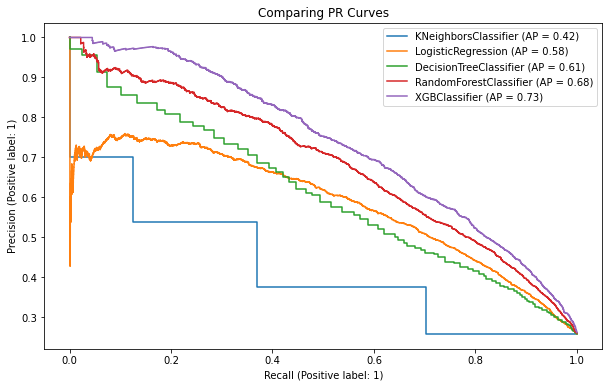

In [84]:
models = [knn, LR, DT, rfc, xgb]

fig, ax = plt.subplots(figsize=(10, 6))
for m in models:
    plot_precision_recall_curve(m, X_test, y_test, ax=ax)
    plt.legend(loc="upper right")
ax.set_title("Comparing PR Curves");

### Feature importances

In [85]:
from sklearn.feature_selection import RFE

# Using Recursive Feature Elimination Function and fitting it in a Logistic Regression Model
modell = LogisticRegression(max_iter=1000, class_weight="balanced")
rfe = RFE(modell, 5)
rfe = rfe.fit(X_train,y_train)
# Displays the feature rank
rfe.ranking_

C:\Users\alber\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([ 1,  1,  1, 69, 66, 47, 64, 13, 12, 18, 22,  1, 21, 59,  1, 20, 24,
       31, 57, 19, 39, 27, 56,  9, 58, 29, 65, 51, 44, 41, 10, 43, 52,  8,
        7, 42, 53, 11, 61, 25, 14, 23, 62, 40, 33, 55, 38, 67, 63, 54, 48,
       30, 60, 17, 15, 16, 26,  2, 36, 28, 46, 45, 37,  4,  3,  6,  5, 32,
       34, 50, 35, 68, 49])

[1.86963011e-01 7.37296700e-02 9.04799506e-02 1.65764368e-02
 1.66767703e-02 1.45937551e-02 1.06120834e-02 1.29439616e-02
 1.92961344e-03 2.52719776e-03 1.22864492e-02 1.74025556e-03
 4.25104825e-03 1.70790816e-02 4.33460330e-03 8.10217579e-03
 1.48140223e-03 1.57726832e-03 1.38237480e-02 1.37281083e-02
 3.83676018e-03 5.73591793e-03 1.25234036e-03 6.51643812e-05
 1.72553590e-02 1.30024731e-02 1.77791957e-02 5.47522997e-04
 1.71440591e-04 2.06609808e-03 3.77761238e-03 1.50214544e-02
 3.31588494e-03 9.86010933e-04 4.14579180e-03 3.13178669e-03
 1.23282482e-02 1.90609186e-04 3.51811704e-03 9.69413238e-03
 1.79338357e-02 1.38122123e-02 1.31725247e-02 1.22513744e-02
 6.47921237e-03 7.78670389e-03 1.74646118e-02 2.41248844e-02
 2.00598308e-02 1.35136189e-02 1.71973734e-02 1.59562004e-02
 1.76923915e-02 1.26614563e-02 7.83573404e-03 4.62915683e-03
 3.57598461e-05 2.31582244e-04 1.30679576e-02 5.11824437e-05
 8.97808788e-03 6.15486305e-03 2.17098198e-02 1.80535309e-02
 6.26242235e-03 1.091780

C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\alber\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 147 missing from current font.
  f

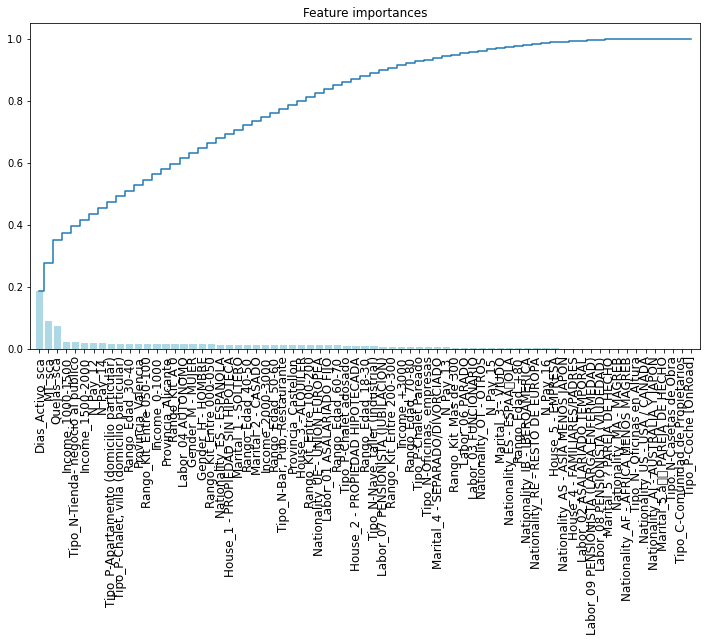

In [86]:
from sklearn.ensemble import ExtraTreesClassifier

# Using ExtraTreesClassifier model function
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

# Printing important features in the model
print(model.feature_importances_)
importances = model.feature_importances_
feat_names = dummy_df.drop(['Monitoring Status'],axis=1).columns

# Displaying the feature importances as a chart by sorting it in the order of importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=12)
plt.xlim([-1, len(indices)])
plt.show()